In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [264]:
df_sld = pd\
    .read_csv(
        'relacionamento_clusters.csv',
        dtype={
            'cod_carteira': str,
            'desc_cnae': str
        }
    )
df_sld = df_sld\
    .astype(
        {
            col: str 
            for col in df_sld\
                .columns[
                    df_sld.columns.str.startswith(
                        ('prod_', 'flg_', 'fone',
                         'mobi', 'ib', 'cod',
                         'possui', 'digital',
                         'num_conta', 'Grupos',
                         'cad_pix', 'num_cpf', 'ano',
                         'num_ano')
                    )
                ]\
                .tolist()
        })
    

df_sld_num_cols_cpf = df_sld\
    .loc[:, df_sld.select_dtypes(include=np.number).columns.tolist() + ['num_cpf_cnpj']]\
    .rename(columns={'renda_mensal': 'renda_mensal_gabriel'})\
    .drop(columns=['alavancagem'])

In [268]:
df = pd\
    .read_csv(
        'cluster_personas.csv',
        dtype={
            'cod_carteira': str,
            'desc_cnae': str,
            'num_cpf_cnpj': str
        }
    )#\
    #.drop(
    #    columns=df_sld_num_cols_cpf\
    #        .drop(columns=['num_cpf_cnpj'])\
    #        .columns.tolist()
    #)\
    #.merge(df_sld_num_cols_cpf, on='num_cpf_cnpj', how='left')

df = df\
    .astype(
        {
            col: str 
            for col in df\
                .columns[
                    df.columns.str.startswith(
                        ('prod_', 'flg_', 'fone',
                         'mobi', 'ib', 'cod',
                         'possui', 'digital',
                         'num_conta', 'Grupos',
                         'cad_pix', 'num_cpf', 'ano',
                         'num_ano')
                    )
                ]\
                .tolist()
        }
    )\
    .drop(columns=df_sld_num_cols_cpf\
        .drop(columns=['renda_mensal_gabriel', 'num_cpf_cnpj'])\
        .columns\
        .tolist()
    )\
    .merge(
        df_sld_num_cols_cpf,
        on='num_cpf_cnpj',
        how='left'
    )

In [42]:
df_sld_personas = df.filter(regex='^Personalizar|^renda_mensal$|^idade|sld_')

In [89]:
sld_prods = df\
    .loc[:, df.columns.str.startswith(('Personalizar', 'prod_'))]\
    .set_index('Personalizar')\
    .stack()\
    .reset_index()\
    .rename(
        columns={
            'level_1': 'produto',
            0: 'possui'
        }
    )\
    .groupby(['Personalizar', 'produto'])\
    .possui.sum().reset_index()

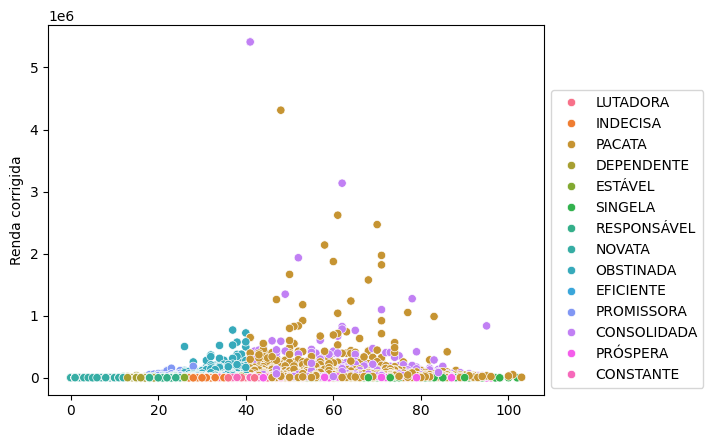

In [273]:
sns.scatterplot(
    data=df,
    x='idade',
    y='Renda corrigida',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

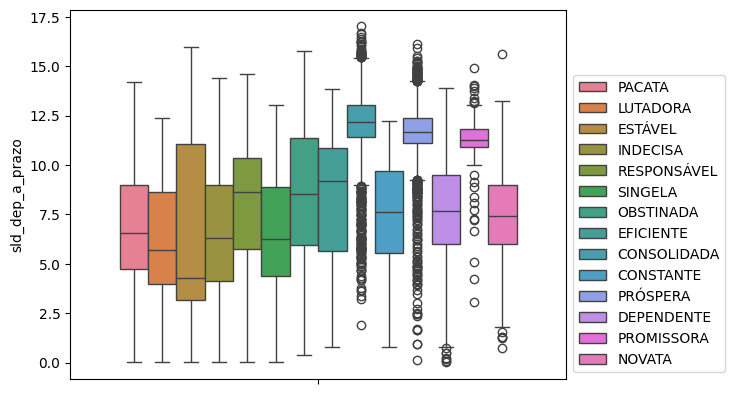

In [128]:
sns.boxplot(
    data=df\
        .assign(sld_dep_a_prazo=lambda x: np.log1p(x.sld_dep_a_prazo))\
        .query('sld_dep_a_prazo != 0'),
    y='sld_dep_a_prazo',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

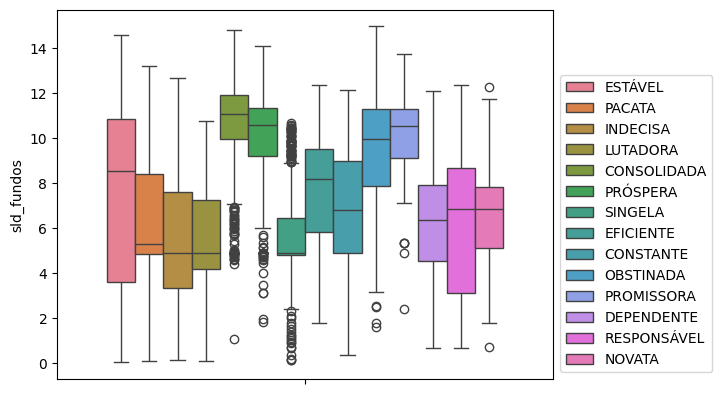

In [127]:
sns.boxplot(
    data=df\
        .assign(sld_fundos=lambda x: np.log1p(x.sld_fundos))\
        .query('sld_fundos != 0'),
    y='sld_fundos',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

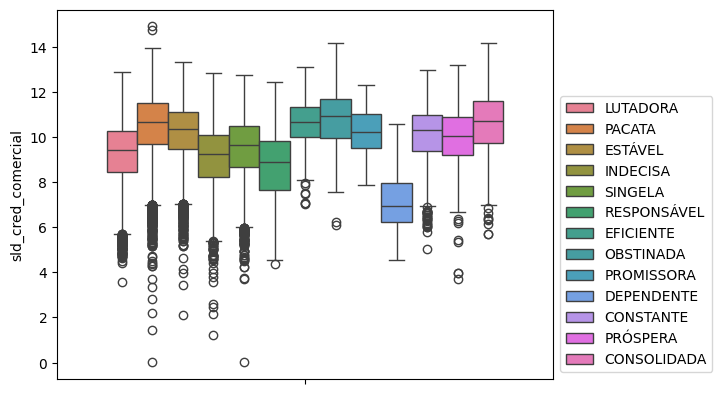

In [126]:
sns.boxplot(
    data=df\
        .assign(sld_cred_comercial=lambda x: np.log1p(x.sld_cred_comercial))\
        .query('sld_cred_comercial != 0'),
    y='sld_cred_comercial',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

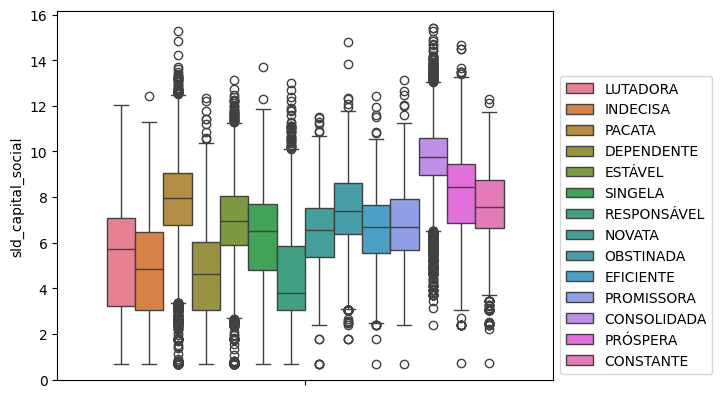

In [124]:
sns.boxplot(
    data=df\
        .assign(sld_capital_social=lambda x: np.log1p(x.sld_capital_social))\
        .query('sld_capital_social != 0'),
    y='sld_capital_social',
    hue='Personalizar'
    )
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

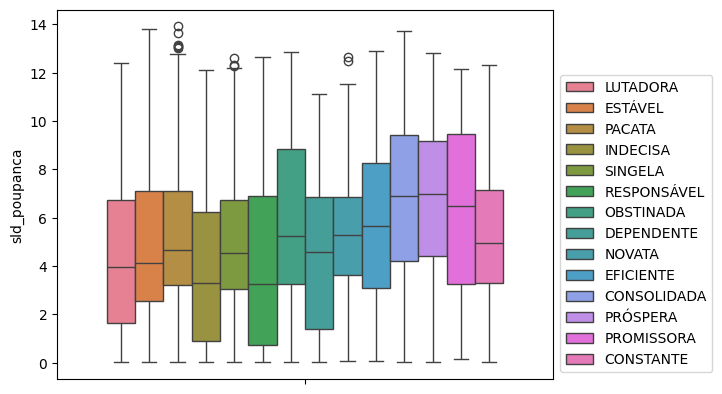

In [123]:
sns.boxplot(
    data=df\
        .assign(sld_poupanca=lambda x: np.log1p(x.sld_poupanca))\
        .query('sld_poupanca != 0'),
    y='sld_poupanca',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

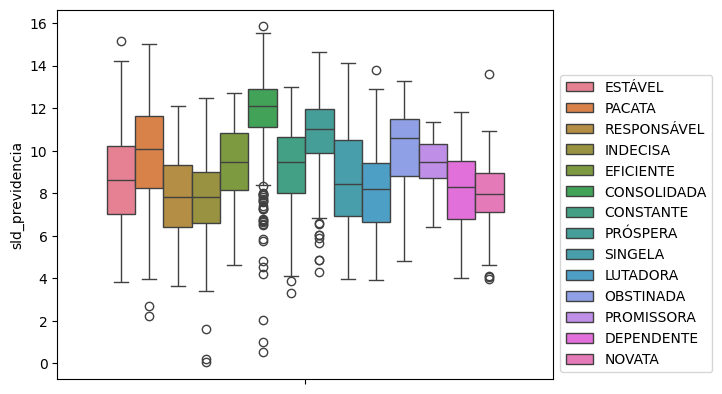

In [122]:
sns.boxplot(
    data=df\
        .assign(sld_previdencia=lambda x: np.log1p(x.sld_previdencia))\
        .query('sld_previdencia != 0'),
    y='sld_previdencia',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

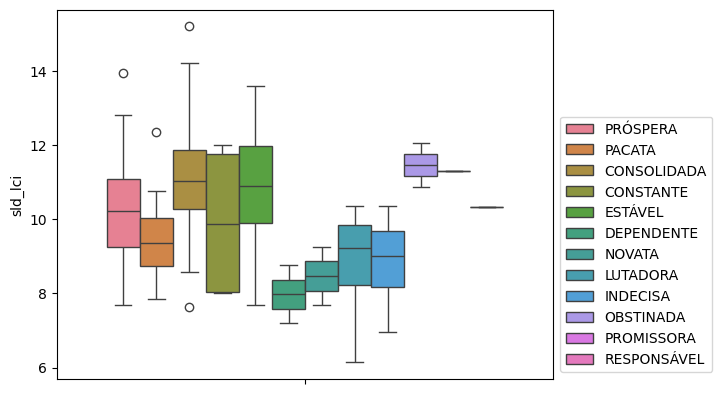

In [130]:
sns.boxplot(
    data=df\
        .assign(sld_lci=lambda x: np.log1p(x.sld_lci))\
        .query('sld_lci != 0'),
    y='sld_lci',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

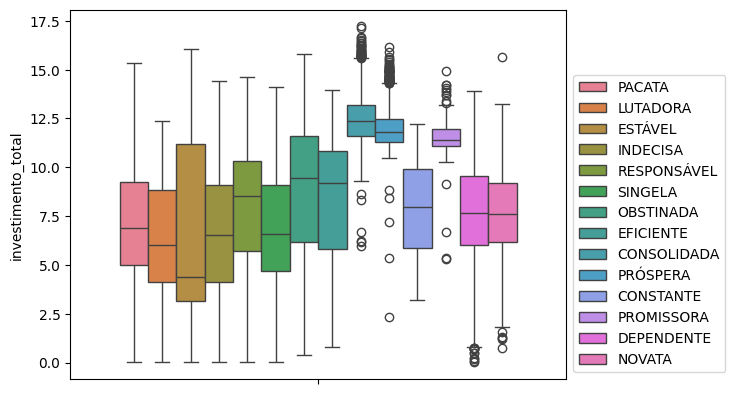

In [121]:
sns.boxplot(
    data=df\
        .assign(investimento_total=lambda x: np.log1p(x.investimento_total))\
        .query('investimento_total != 0'),
    y='investimento_total',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

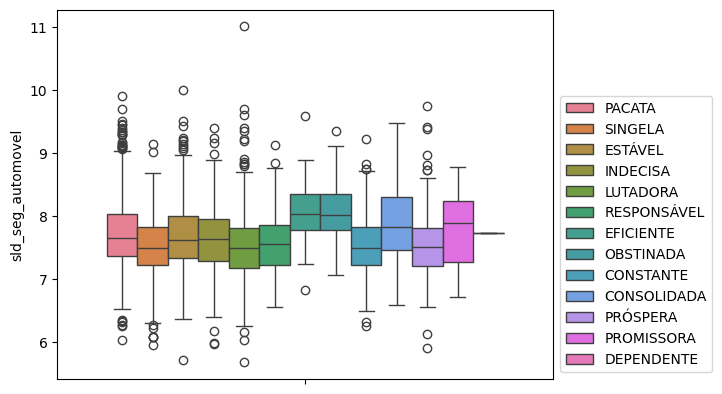

In [131]:
sns.boxplot(
    data=df\
        .assign(sld_seg_automovel=lambda x: np.log1p(x.sld_seg_automovel))\
        .query('sld_seg_automovel != 0'),
    y='sld_seg_automovel',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

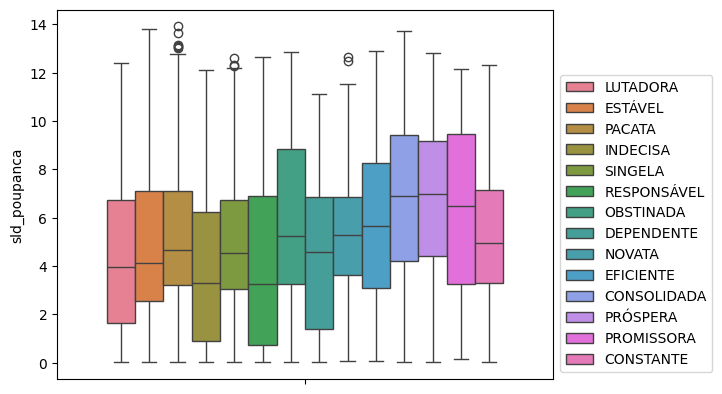

In [132]:
sns.boxplot(
    data=df\
        .assign(sld_poupanca=lambda x: np.log1p(x.sld_poupanca))\
        .query('sld_poupanca != 0'),
    y='sld_poupanca',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


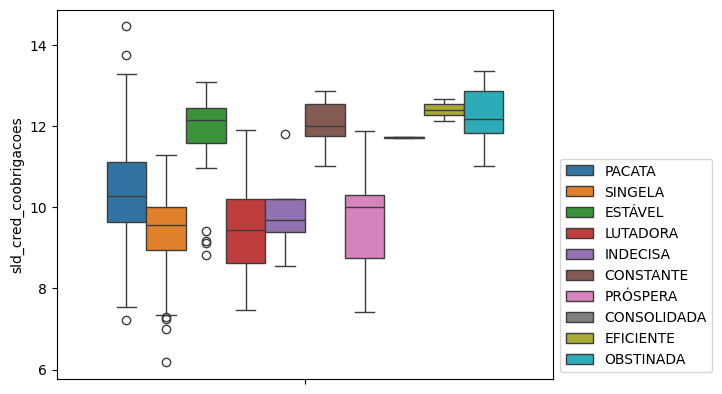

In [133]:
sns.boxplot(
    data=df\
        .assign(sld_cred_coobrigacoes=lambda x: np.log1p(x.sld_cred_coobrigacoes))\
        .query('sld_cred_coobrigacoes != 0'),
    y='sld_cred_coobrigacoes',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


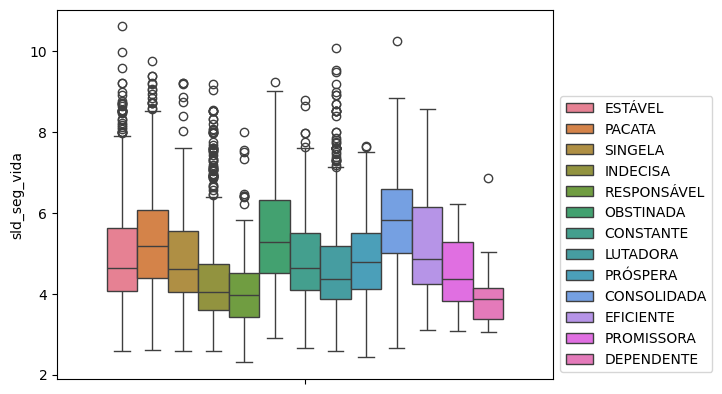

In [134]:
sns.boxplot(
    data=df\
        .assign(sld_seg_vida=lambda x: np.log1p(x.sld_seg_vida))\
        .query('sld_seg_vida != 0'),
    y='sld_seg_vida',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


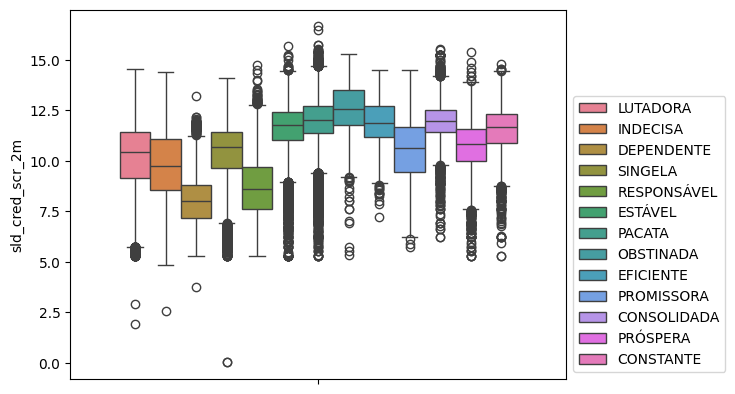

In [135]:
sns.boxplot(
    data=df\
        .assign(sld_cred_scr_2m=lambda x: np.log1p(x.sld_cred_scr_2m))\
        .query('sld_cred_scr_2m != 0'),
    y='sld_cred_scr_2m',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


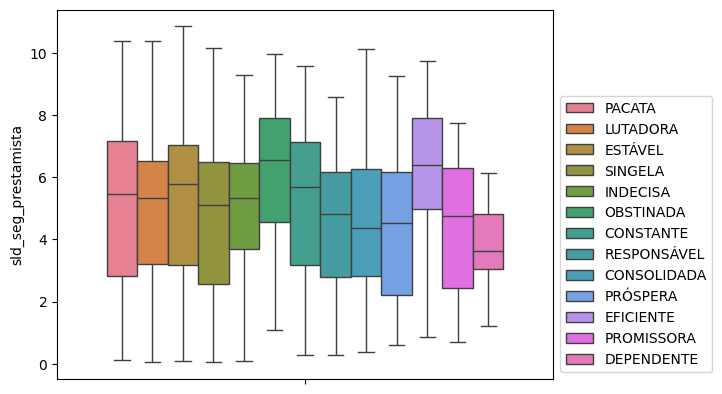

In [140]:
sns.boxplot(
    data=df\
        .assign(sld_seg_prestamista=lambda x: np.log1p(x.sld_seg_prestamista))\
        .query('sld_seg_prestamista != 0'),
    y='sld_seg_prestamista',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


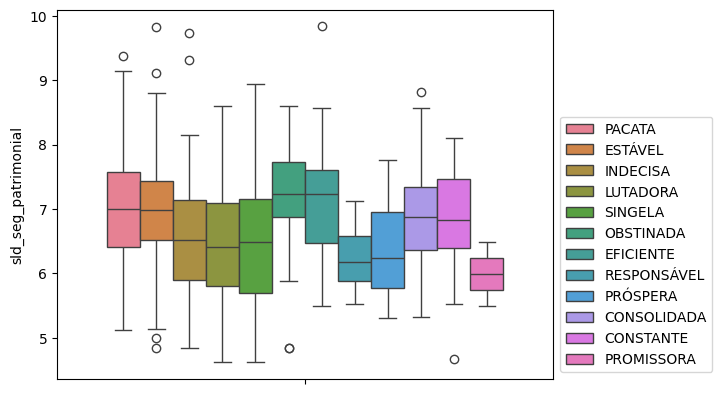

In [138]:
sns.boxplot(
    data=df\
        .assign(sld_seg_patrimonial=lambda x: np.log1p(x.sld_seg_patrimonial))\
        .query('sld_seg_patrimonial != 0'),
    y='sld_seg_patrimonial',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


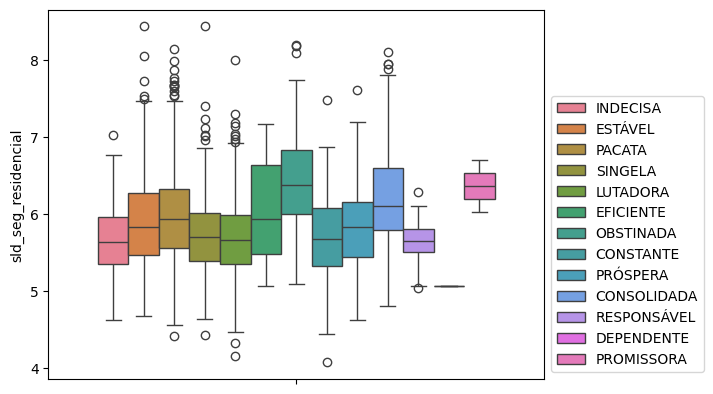

In [139]:
sns.boxplot(
    data=df\
        .assign(sld_seg_residencial=lambda x: np.log1p(x.sld_seg_residencial))\
        .query('sld_seg_residencial != 0'),
    y='sld_seg_residencial',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


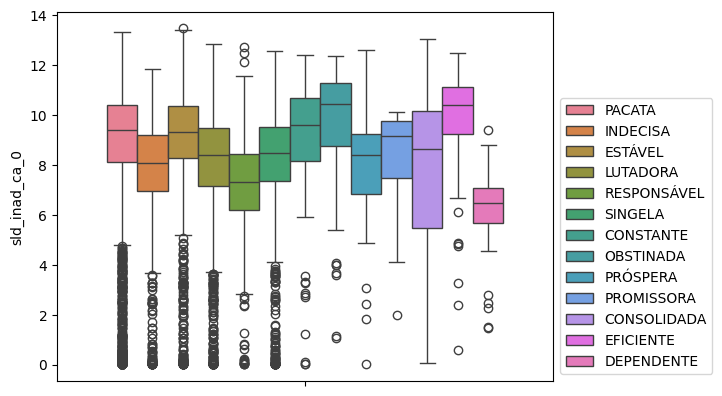

In [136]:
sns.boxplot(
    data=df\
        .assign(sld_inad_ca_0=lambda x: np.log1p(x.sld_inad_ca_0))\
        .query('sld_inad_ca_0 != 0'),
    y='sld_inad_ca_0',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


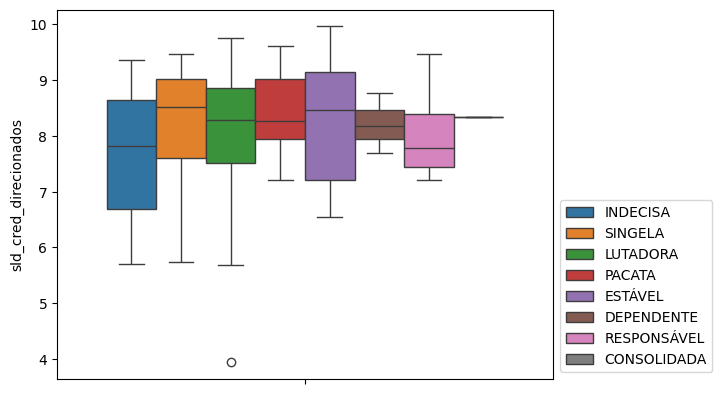

In [142]:
sns.boxplot(
    data=df\
        .assign(sld_cred_direcionados=lambda x: np.log1p(x.sld_cred_direcionados))\
        .query('sld_cred_direcionados != 0'),
    y='sld_cred_direcionados',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


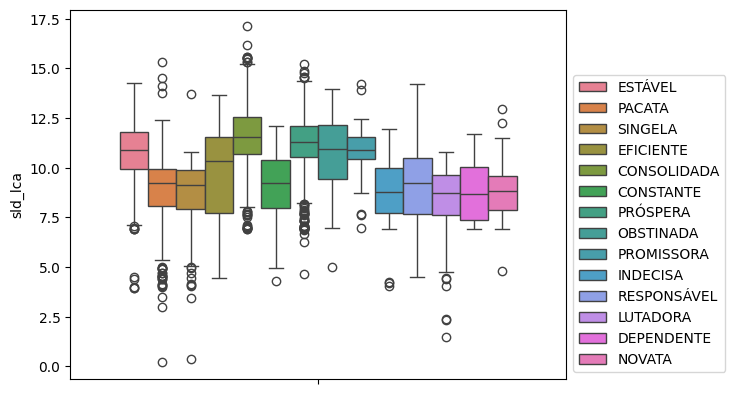

In [141]:
sns.boxplot(
    data=df\
        .assign(sld_lca=lambda x: np.log1p(x.sld_lca))\
        .query('sld_lca != 0'),
    y='sld_lca',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


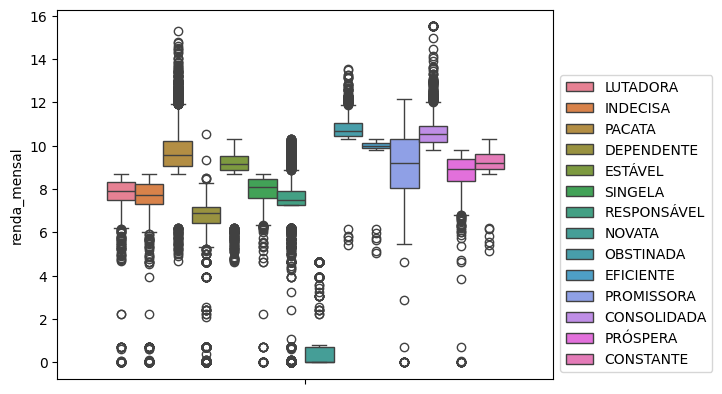

In [257]:
sns.boxplot(
    data=df\
        .assign(renda_mensal=lambda x: np.log1p(x.renda_mensal)),
    y='renda_mensal',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))


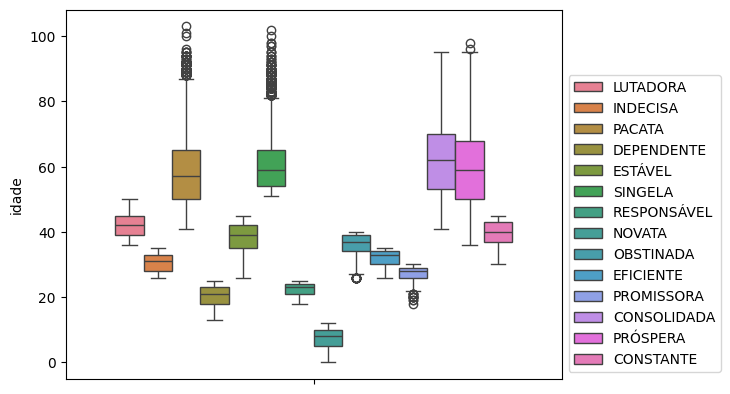

In [255]:
sns.boxplot(
    data=df,
    y='idade',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

/mnt/c/Users/jesus_gabriel/Documents/seg/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/mnt/c/Users/jesus_gabriel/Documents/seg/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


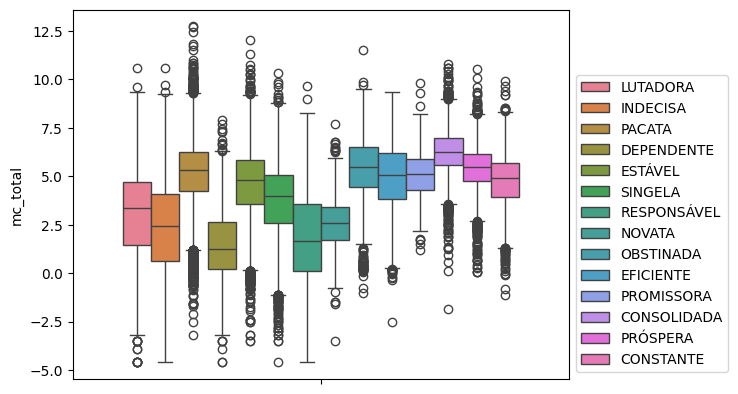

In [276]:
sns.boxplot(
    data=df\
        .assign(mc_total=lambda x: (x.mc_total - x.mc_total.mean()) / x.mc_total.std())\
        .query('mc_total != 0'),
    y='mc_total',
    hue='Personalizar'
)
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

## Proporção de personas por cooperativa

In [249]:
persona_por_coop = df\
    .groupby(['Personalizar', 'cod_coop'])\
    .size().reset_index(name='quantidade')\
    .sort_values('quantidade')\
    .assign(
        prop=lambda x: (
            x.quantidade / x
            .groupby(['cod_coop'])
            .quantidade
            .transform('sum') * 100
        )
    )\
    .sort_values('prop')

In [250]:
num_columns = df\
    .astype(
        {
            col: str 
            for col in df\
                .columns[
                    df.columns.str.startswith(
                        ('prod_', 'flg_', 'fone',
                         'mobi', 'ib', 'cod',
                         'possui', 'digital',
                         'num_conta', 'Grupos',
                         'cad_pix', 'num_cpf', 'ano',
                         'num_ano')
                    )
                ]\
                .tolist()
        })\
    .select_dtypes(include=np.number)\
    .drop(columns=['vlr_prej_cred_rural', 'mc_seguro_rural'])

In [251]:
corr = num_columns.corr('spearman')